Hello and welcome all ! This is my US foods case Study. Off the bat I realized that the Data Set was very clean (not much pre-processing required) so I jumped straight into some visualizations and creating my two models.

In [33]:
import pandas as pd #pandas for data manipulation
import numpy as np #numpy for numerical 
import seaborn as sns #seaborn for visualizations
import matplotlib.pyplot as plt #plot our visualizations
%matplotlib inline

In [54]:
#Loading Data Set and storing in variable
df=pd.read_excel('/Users/adkeme/Downloads/Survey Data Assessment Final.xlsx')
df

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,29645,479.860192,479.860192,479.860192,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4027,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4028,117052,508.383269,508.383269,508.383269,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4029,139187,934.297115,934.297115,934.297115,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [36]:
df=df.drop_duplicates()
df #after checking the Data Frame 59 of the original 4031 were dropped as duplicates.

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,29645,479.860192,479.860192,479.860192,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4027,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4028,117052,508.383269,508.383269,508.383269,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4029,139187,934.297115,934.297115,934.297115,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [37]:
df.columns

Index(['CUST_NBR', 'REPORTED_WKLY_SPEND', 'REPORTED_WKLY_SPEND_USF',
       'REPORTED_WKLY_SPEND_USF_DAILY_SERVICE', 'REPORTED_WKLY_SPEND_COMP',
       'REPORTED_WKLY_SPEND_COMPETITOR_1', 'REPORTED_WKLY_SPEND_OTHER_BLD',
       'REPORTED_WKLY_SPEND_SPCLTY', 'REPORTED_WKLY_SPEND_CC',
       'REPORTED_WKLY_SPEND_OTHER', 'REPORTED_COP_SPEND',
       'REPORTED_PRODUCE_SPEND', 'SMALL_QTY_RANK', 'DEL_FLEX_RANK',
       'CUT_TIME_RANK'],
      dtype='object')

In [38]:
print(df.info()) #grabbed the info to make sure we have sufficent data per column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972 entries, 0 to 4030
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CUST_NBR                               3972 non-null   int64  
 1   REPORTED_WKLY_SPEND                    3972 non-null   float64
 2   REPORTED_WKLY_SPEND_USF                3972 non-null   float64
 3   REPORTED_WKLY_SPEND_USF_DAILY_SERVICE  3972 non-null   float64
 4   REPORTED_WKLY_SPEND_COMP               3972 non-null   float64
 5   REPORTED_WKLY_SPEND_COMPETITOR_1       3972 non-null   float64
 6   REPORTED_WKLY_SPEND_OTHER_BLD          3972 non-null   float64
 7   REPORTED_WKLY_SPEND_SPCLTY             3972 non-null   float64
 8   REPORTED_WKLY_SPEND_CC                 3972 non-null   float64
 9   REPORTED_WKLY_SPEND_OTHER              3972 non-null   float64
 10  REPORTED_COP_SPEND                     3972 non-null   float64
 11  REPO

In [42]:
df.isnull().sum() #Luckily, we dont have any null values for our data either.

CUST_NBR                                 0
REPORTED_WKLY_SPEND                      0
REPORTED_WKLY_SPEND_USF                  0
REPORTED_WKLY_SPEND_USF_DAILY_SERVICE    0
REPORTED_WKLY_SPEND_COMP                 0
REPORTED_WKLY_SPEND_COMPETITOR_1         0
REPORTED_WKLY_SPEND_OTHER_BLD            0
REPORTED_WKLY_SPEND_SPCLTY               0
REPORTED_WKLY_SPEND_CC                   0
REPORTED_WKLY_SPEND_OTHER                0
REPORTED_COP_SPEND                       0
REPORTED_PRODUCE_SPEND                   0
SMALL_QTY_RANK                           0
DEL_FLEX_RANK                            0
CUT_TIME_RANK                            0
dtype: int64

<AxesSubplot:>

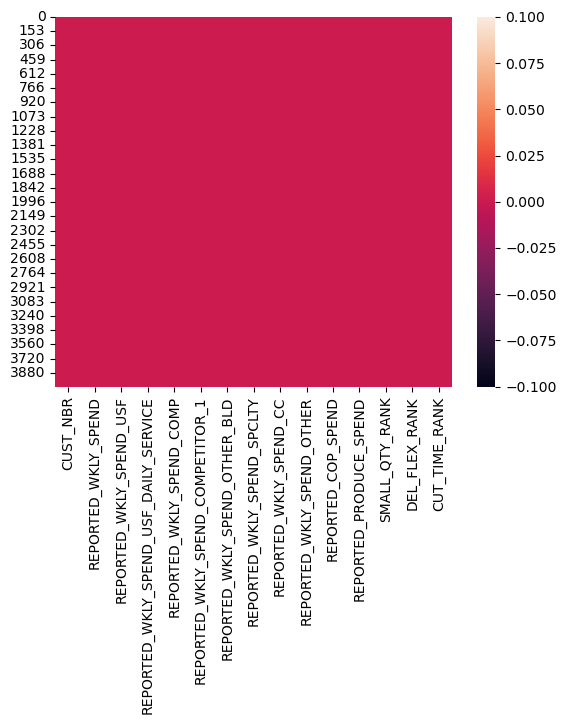

In [48]:
sns.heatmap(df.isnull()) #A visual representation that our Data is filled and not missing Values..

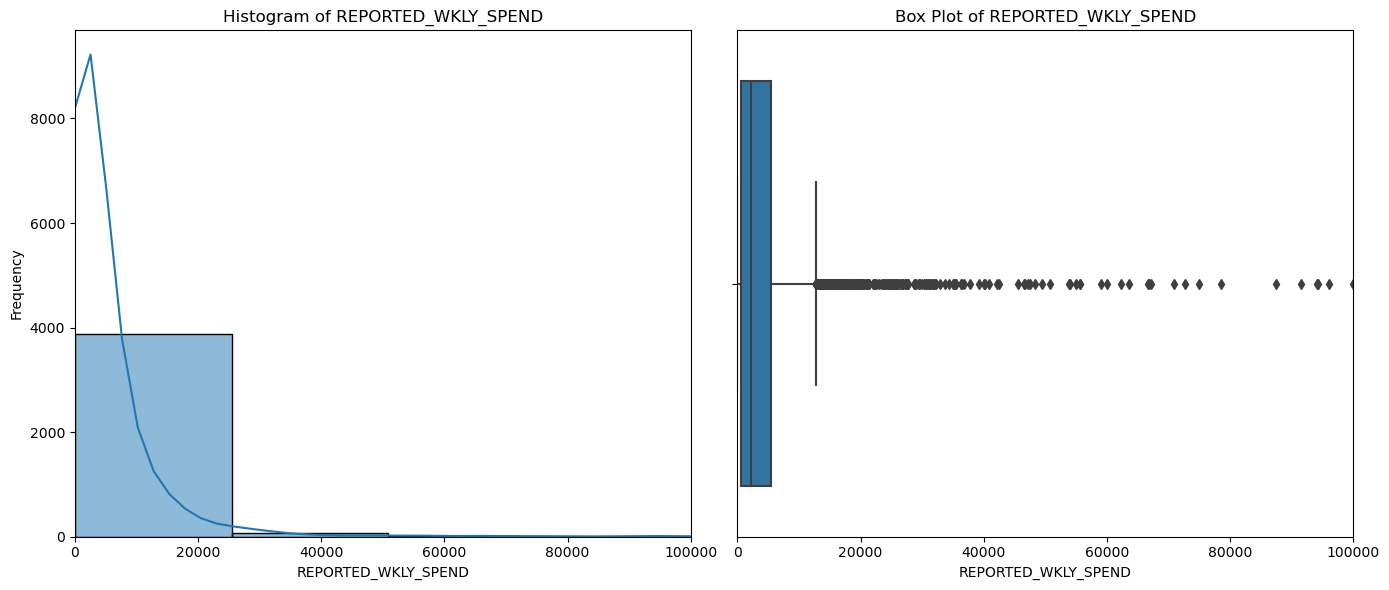

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram for our weekly spend.
sns.histplot(df['REPORTED_WKLY_SPEND'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of REPORTED_WKLY_SPEND')
axes[0].set_xlabel('REPORTED_WKLY_SPEND')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0,100000)
# Box plot for our weekly spend.
sns.boxplot(x=df['REPORTED_WKLY_SPEND'], ax=axes[1])
axes[1].set_title('Box Plot of REPORTED_WKLY_SPEND')
axes[1].set_xlabel('REPORTED_WKLY_SPEND')
axes[1].set_xlim(0,100000)

plt.tight_layout()

#Our visualizations show us that our weekly customers dont spend over 20-25k weekly
#very few do.

Text(0.5, 1.0, 'Spending Breakdown by Category (Pie Chart)')

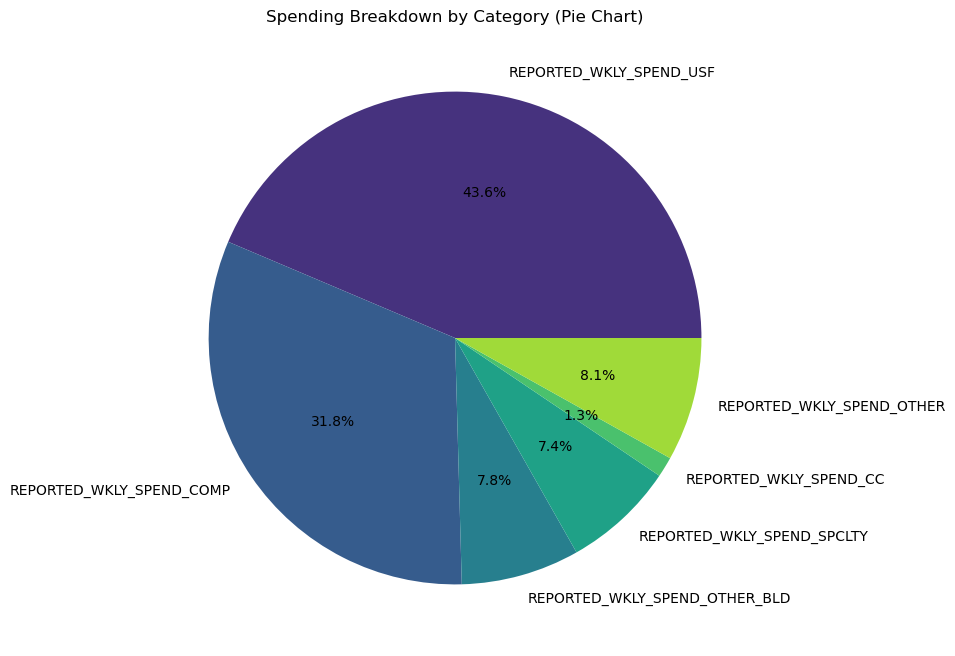

In [59]:
spending_columns = ['REPORTED_WKLY_SPEND_USF', 'REPORTED_WKLY_SPEND_COMP', 'REPORTED_WKLY_SPEND_OTHER_BLD',
                    'REPORTED_WKLY_SPEND_SPCLTY', 'REPORTED_WKLY_SPEND_CC', 'REPORTED_WKLY_SPEND_OTHER']

# Create a new DataFrame with spending breakdown
spending_df = df[spending_columns]


# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(spending_df.sum(), labels=spending_columns, autopct='%1.1f%%', 
        colors=sns.color_palette("viridis", len(spending_columns)))
plt.title('Spending Breakdown by Category -Pie Chart')
#Our pie chart shows us that 43% of spending is with us, whilst 32% is with our 
#competitors. All other forms of spending combined are slightly under 25% or 3/4.

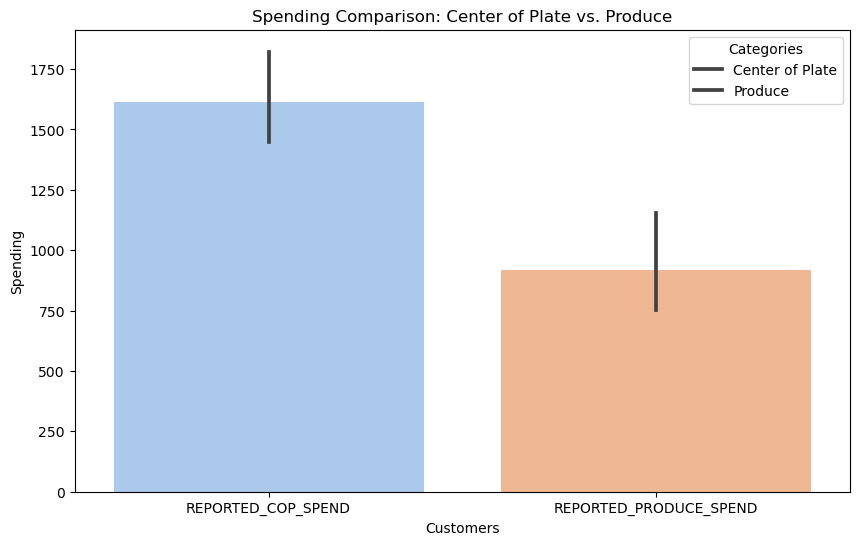

In [60]:
spending_comparison_df = df[['REPORTED_COP_SPEND', 'REPORTED_PRODUCE_SPEND']]

# Side-by-Side Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=spending_comparison_df, palette="pastel")
plt.title('Spending Comparison: Center of Plate vs. Produce')
plt.xlabel('Customers')
plt.ylabel('Spending')
plt.legend(title='Categories', labels=['Center of Plate', 'Produce'])
plt.show()
#I compared the spending between Center of Plate and Produce, safe to say alot more gets
#spent on Protein Items, nearly 50% increase as compared to Produce.



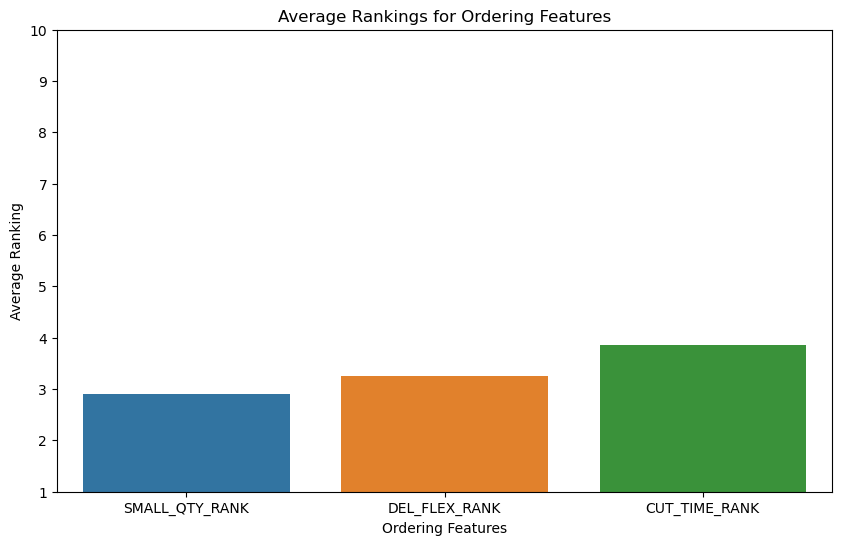

In [88]:
# Select relevant columns
rankings_columns = ['SMALL_QTY_RANK', 'DEL_FLEX_RANK', 'CUT_TIME_RANK']
rankings_data = df[rankings_columns]

# Calculate average rankings
average_rankings = rankings_data.mean()

#Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rankings.index, y=average_rankings.values)
plt.title('Average Rankings for Ordering Features')
plt.xlabel('Ordering Features')
plt.ylabel('Average Ranking')
plt.ylim(1, 10) #0's were reserved for non voters and 10 is the limit
plt.show()

#A later order deadline, averages out to be most important. Flexible deliveries is 2nd, with 
#ordering small quantities being most important

In [83]:
from sklearn.model_selection import train_test_split #Split our data into training/testing
from sklearn.linear_model import LinearRegression #Our first regression model
from sklearn.ensemble import RandomForestRegressor #Our second regression model
from sklearn.metrics import mean_squared_error,r2_score #Metrics for grading our model
from math import sqrt

In [77]:
# Define the target variable
target_variable = 'REPORTED_WKLY_SPEND'

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_variable]) #Our entire df barring that target_variable
y = df[target_variable] #specifically our target_variable

# Split the data into training and testing sets, 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [78]:
# Model 1: Linear Regression
linear_model = LinearRegression() #create an instance of it
linear_model.fit(X_train, y_train) #fit our training data

# Predictions on the test set
linear_predictions = linear_model.predict(X_test) #store our predictions in linear_predictions

In [79]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor() #create an instance of it
rf_model.fit(X_train, y_train) #fit our model

# Predictions on the test set
rf_predictions = rf_model.predict(X_test) #store our predictions in rf_predictions

In [80]:
# Evaluate the models
def evaluate_model(predictions, true_values, model_name):
    rmse = sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)
    print(f"{model_name} - RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

# Evaluate Linear Regression
evaluate_model(linear_predictions, y_test, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(rf_predictions, y_test, "Random Forest Regressor")


Linear Regression - RMSE: 0.00, R2 Score: 1.00
Random Forest Regressor - RMSE: 2375.71, R2 Score: 0.95


In [84]:
#Our Linear Regression model was extremely strong. A 0 RMSE indicates perfect predictions
#An R2 score of 1.00 means 100% variance acress data set which is extremely strong

In [ ]:
#Our Random Forest score was also good, RMSE of 2375 indicates the distance between predicted
#and observed values, .95 also represents 95% variance.